## Importing Libraries 

In [92]:
import numpy as np
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn
import time

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

pd.set_option('display.max_rows', 100) 

pd.set_option('max_columns', None)


import warnings
warnings.filterwarnings('ignore')

## Load Data

In [93]:
train_df = pd.read_csv("aug_train.csv")

train_df = train_df.drop(['enrollee_id', 'city', 'company_size'], axis = 1)


## Exploring Data

In [94]:
train_df.shape

(19158, 11)

In [95]:
test_df.shape

(2129, 10)

In [96]:
train_df.isna().any()

city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [97]:
test_df.isna().any()

city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_type               True
last_new_job               True
training_hours            False
dtype: bool

In [98]:
train_df.head(10)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0
5,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,1,24,1.0
6,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,Funded Startup,1,24,0.0
7,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,Pvt Ltd,>4,18,1.0
8,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,Pvt Ltd,1,46,1.0
9,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,Pvt Ltd,>4,123,0.0


In [99]:
train_df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [100]:
train_df.dtypes

city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

Observations: Main concern is that dataset is unbalanced which will end up skewing our model's performance 

## Data Cleaning 

In [101]:
train_df['relevent_experience'] = train_df['relevent_experience'].replace(['Has relevent experience', 'No relevent experience'], ['Yes', 'No'])

In [102]:
train_df['experience'] = train_df['experience'].replace(['>20', '<1'], ['20', '0'])

In [103]:
train_df = train_df.dropna()

In [104]:
train_df['experience'] = train_df['experience'].astype('int32')

In [105]:
train_df['last_new_job'] = train_df['last_new_job'].replace(['>4', 'never'], ['5', '0'])
train_df['last_new_job'] = train_df['last_new_job'].astype('int32')

In [106]:
train_df['target'] = train_df['target'].astype('int32')

## Exploratory Data Analysis (EDA)

<Figure size 1008x576 with 0 Axes>

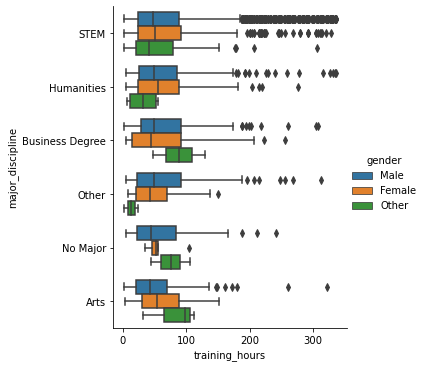

In [107]:
plt.figure(figsize =(14,8))
sns.catplot(data = train_df, x = 'training_hours', y = 'major_discipline', kind = 'box', orient = 'h', hue = 'gender')

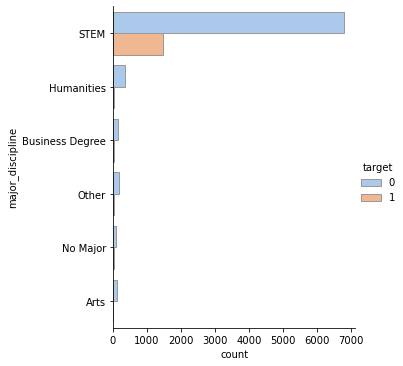

In [108]:
sns.catplot(y = 'major_discipline', hue = 'target', kind = 'count', palette = 'pastel', edgecolor = '.6', data = train_df )

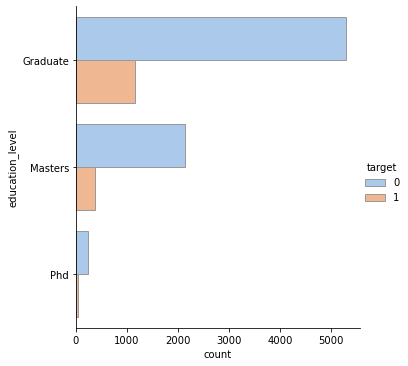

In [109]:
sns.catplot(y = 'education_level', hue = 'target', kind = 'count', palette = 'pastel', edgecolor = '.6', data = train_df )

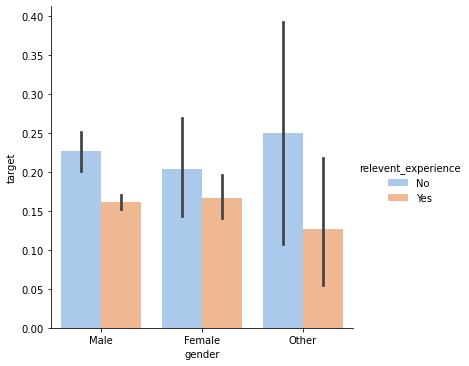

In [110]:
sns.catplot(x="gender", y="target", hue="relevent_experience", palette="pastel", kind="bar", data=train_df)

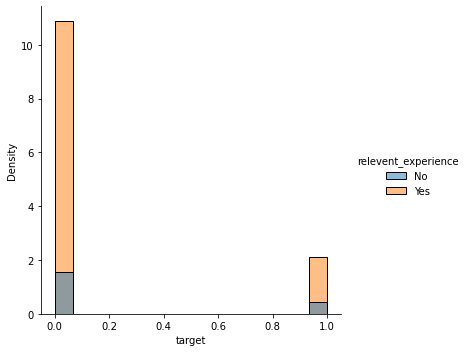

In [111]:
sns.displot(train_df, x="target", hue="relevent_experience",  stat="density")

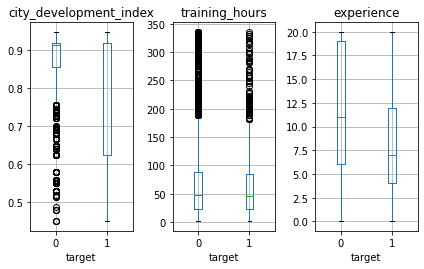

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=3)
train_df.boxplot(column = 'city_development_index', by = 'target', ax = axes[0])
train_df.boxplot(column = 'training_hours', by = 'target', ax = axes[1])
train_df.boxplot(column = 'experience', by = 'target', ax = axes[2])


for ax in axes:
    ax.set_xlabel('target')
    
plt.suptitle('')
plt.tight_layout()

<AxesSubplot:>

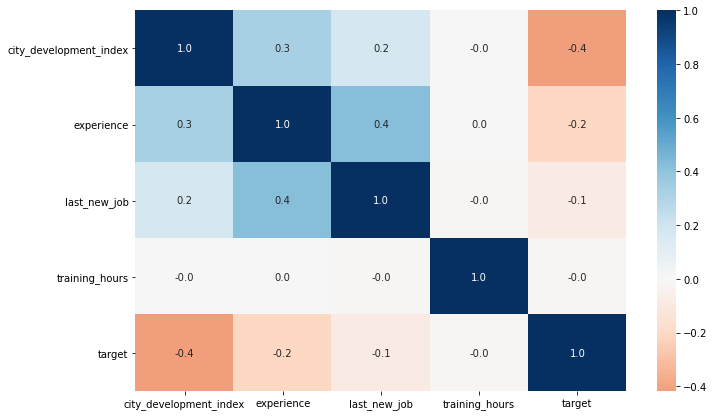

In [113]:
corr = train_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'RdBu', center = 0, ax = ax)

## Encoding Categorical Variables 

In [114]:
le = LabelEncoder()
train_df['education_level'] = le.fit_transform(train_df['education_level'])
train_df['gender'] = le.fit_transform(train_df['gender'])
train_df['enrolled_university'] = le.fit_transform(train_df['enrolled_university'])
train_df['major_discipline'] = le.fit_transform(train_df['major_discipline'])
train_df['company_type'] = le.fit_transform(train_df['company_type'])
train_df['relevent_experience'] = le.fit_transform(train_df['relevent_experience'])


## Training and testing data split

In [115]:
X = train_df.drop(columns = ["target"], axis = 1)
y = train_df['target']

In [116]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [117]:
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.3, random_state=42)

## Model Building 

In [118]:
parameters = {
        'max_depth': range(2, 6),
        'n_estimators': [50, 100, 150, 200, 250, 300],
        'subsample': [0.6, 0.7, 0.8],
        'colsample_bytree': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'colsample_bynode': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 1],
        'gamma': [0, 5, 10, 15, 20],
        'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'lambda': [0.1, 0.25, 0.5, 0.75, 1]
}

start = time.time() 

clf = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder = False, eval_metric = "logloss"), 
                         parameters, n_jobs=4, scoring = "roc_auc", n_iter = 300,
                         random_state = 123)

clf.fit(X_train, y_train)

end = time.time()

# print the number of seconds it takes to run the hyperparameter search
print("Total time in seconds ==> ", end - start)

Total time in seconds ==>  992.110237121582


In [119]:
clf.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.25,
 'lambda': 0.25,
 'gamma': 0,
 'colsample_bytree': 0.6,
 'colsample_bynode': 1}

## Model Performance

In [120]:
## Create a data frame with the feature importances
###################################################
# First create an empty data frame
imp = pd.DataFrame()

# add a column for the variable names
imp["var"] = X_train.columns

# add a column with the feature importances
imp["imp"] = clf.best_estimator_.feature_importances_

# sort the data frame by the feature importances in descending order - most important features at the top
imp = imp.sort_values("imp", ascending = False).reset_index(drop = True)

# print out the data frame
imp

,var,imp
0,city_development_index,0.274587
1,education_level,0.123776
2,relevent_experience,0.094667
3,experience,0.087255
4,enrolled_university,0.083823
5,company_type,0.080694
6,training_hours,0.069144
7,gender,0.064720
8,last_new_job,0.063336
9,major_discipline,0.057997


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance score', ylabel='Features'>

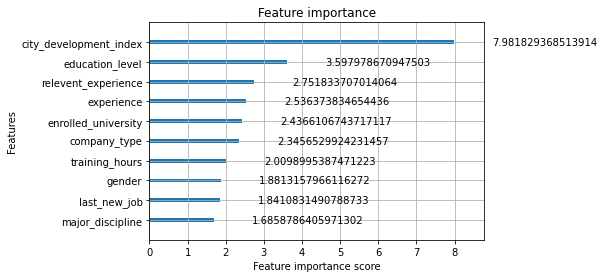

In [121]:
# non-normalized feature importance
# XGBoost has a built-in function to plot importa nce
xgb.plot_importance(clf.best_estimator_, importance_type = "gain", xlabel = "Feature importance score")

In [122]:
y_train_prob = clf.predict_proba(X_train) 
y_val_prob = clf.predict_proba(X_valid)

In [123]:
thresh = np.arange(0.01, 1, .01) # create array 0.01, 0.02, 0.03, ..., 0.99

# create empty lists for each metric
precision_values = []
recall_values = []
acc_values = []
f1_values = []

# Loop through each threshold value - .01, .02, .03, ..., .99
for val in thresh:
    
    # get 1 / 0 predictions based off probability threshold
    pred = [1 if prob >= val else 0 for prob in y_train_prob[:,1]]
    
    # calculate precision, recall, accuracy, and f1-score
    precision = metrics.precision_score(y_train, pred)
    recall = metrics.recall_score(y_train, pred)
    accuracy = metrics.accuracy_score(y_train, pred)
    f1_score = metrics.f1_score(y_train, pred)
    
    # add precision, recall, accuracy, and f1-score to their respective lists
    precision_values.append(precision)
    recall_values.append(recall)
    acc_values.append(accuracy)
    f1_values.append(f1_score)

# put precision, recall, and accuracy values into a data frame
result = pd.DataFrame()
result["threshold"] = thresh
result["precision"] = precision_values
result["recall"] = recall_values
result["accuracy"] = acc_values
result["f1_score"] = f1_values

result 

,threshold,precision,recall,accuracy,f1_score
0,0.01,0.525470,1.000000,0.548513,0.688929
1,0.02,0.552250,1.000000,0.594650,0.711547
2,0.03,0.577955,1.000000,0.634915,0.732537
3,0.04,0.603444,0.999441,0.671358,0.752527
4,0.05,0.627004,0.999068,0.702395,0.770469
5,0.06,0.651703,0.998695,0.732501,0.788722
6,0.07,0.675891,0.997204,0.759530,0.805694
7,0.08,0.697911,0.996644,0.782645,0.820946
8,0.09,0.715261,0.996085,0.799795,0.832632
9,0.10,0.732839,0.995153,0.816199,0.844086


In [124]:
result.iloc[result.f1_score.idxmax()]

threshold    0.470000
precision    0.955467
recall       0.939970
accuracy     0.948085
f1_score     0.947655
Name: 46, dtype: float64

In [125]:
## Use above threshold to calculate accuracy, precision, recall, and F1-score on validation set

# get 1 / 0 predictions based off probability threshold
pred = [1 if prob >= 0.4 else 0 for prob in y_val_prob[:,1]]

# calculate precision, recall, accuracy, and f1-score
precision = metrics.precision_score(y_valid, pred)
recall = metrics.recall_score(y_valid, pred)
accuracy = metrics.accuracy_score(y_valid, pred)
f1_score = metrics.f1_score(y_valid, pred)

print("Validation precision: ", precision)
print("Validation recall: ", recall)
print("Validation accuracy: ", accuracy)
print("Validation F1-Score: ", f1_score)

Validation precision:  0.8788912579957356
Validation recall:  0.8960869565217391
Validation accuracy:  0.8862796260056534
Validation F1-Score:  0.8874058127018298
